# **Bayesian linear regression using Importance Sampling**

We formulate the linear regression problem from a Bayesian point of view and estimate the parameters using Importance sampling.

*   The goal is to fit a linear model $\hat{y} = w_0 + w_1 x$.
*   We assume prior distributions on $w_0$ and $w_1$ and will obtain the posteriors using importance sampling.
*   The parameters will be estimated using the expectation of the posterior distributions.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
# Simulated data. x is randomly distributed between 0 and 3 and y is a linear model
N = 50 # number of data items
x = np.random.uniform(0, 3, N)
y = 3 * x + 1 + np.random.normal(0, 1, N)



*   The prior distribution on $w_0$ will be a ${\cal N}(\mu_0,\sigma_0)$, with $\mu_0=a_0$ and $\sigma_0=b_0$.
*   The prior distribution on $w_1$ will be a ${\cal N}(\mu_1,\sigma_1)$, with $\mu_1=a_1$ and $\sigma_1=b_1$.

In [ ]:
# Prior distributions
a0 = 0
b0 = 1
a1 = 0
b1 = 1

In [ ]:
K = 30  # Sample size used in each iteration. Increasing K should improve the results
for i in range(N):
    print(f'Data item no.: {i+1}')

    s_w0 = np.random.normal(a0, b0, K)
    s_w1 = np.random.normal(a1, b1, K)
    s_epsilon = np.random.normal(0, 1, K)

    var_yi = b0**2 + b1**2 * x[i]**2 + 1

    p = (norm.pdf(s_w0, a0, b0) *
         norm.pdf(s_w1, a1, b1) *
         norm.pdf(y[i], s_w0 + s_w1 * x[i] + s_epsilon, np.sqrt(var_yi)))

    p_star = norm.pdf(s_w0, a0, b0) * norm.pdf(s_w1, a1, b1)
    weights = p / p_star
    sum_weights = np.sum(weights)

    est_a0 = np.sum(weights * s_w0) / sum_weights
    est_b0 = np.sum(weights * s_w0**2) / sum_weights
    a0 = est_a0
    b0 = np.sqrt(est_b0 - est_a0**2)
    print(f'a0={a0} ; b0={b0}')

    est_a1 = np.sum(weights * s_w1) / sum_weights
    est_b1 = np.sum(weights * s_w1**2) / sum_weights
    a1 = est_a1
    b1 = np.sqrt(est_b1 - est_a1**2)
    print(f'a1={a1} ; b1={b1}')

Data item no.: 1
a0=0.28351237364828913 ; b0=0.9816719911327274
a1=1.1352336225910016 ; b1=0.9679694952119329
Data item no.: 2
a0=0.491711896923803 ; b0=0.961653175377242
a1=1.8889829663774313 ; b1=0.7705875866828912
Data item no.: 3
a0=0.4582050446447458 ; b0=0.7381790876455221
a1=2.091181047154946 ; b1=0.6561354741302591
Data item no.: 4
a0=0.8283348869444506 ; b0=0.6616747928497675
a1=2.3495643709279292 ; b1=0.4695530781163394
Data item no.: 5
a0=0.8675077385345222 ; b0=0.6499665992366358
a1=2.5223396336237 ; b1=0.4161559732838951
Data item no.: 6
a0=0.7907190034444699 ; b0=0.7503385200757466
a1=2.3846318082980753 ; b1=0.3358317837281176
Data item no.: 7
a0=0.839335160702984 ; b0=0.850263346904443
a1=2.5031841562815624 ; b1=0.40987990226923604
Data item no.: 8
a0=0.9447024682243294 ; b0=0.9597405009787692
a1=2.4950759335935446 ; b1=0.3412513735056507
Data item no.: 9
a0=1.2718272440815348 ; b0=0.8725890174471118
a1=2.5528860323436846 ; b1=0.29777388694783974
Data item no.: 10
a0=1.8

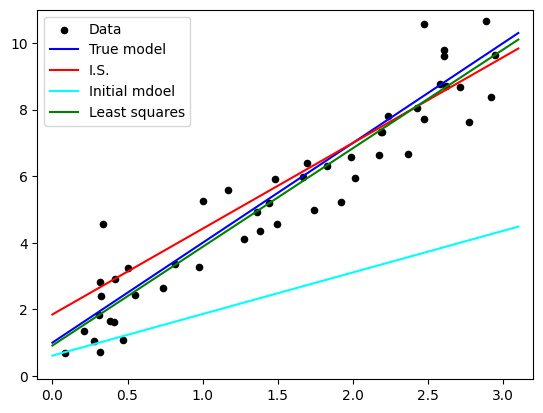

In [ ]:
# Plotting the results
plt.scatter(x, y, color='black', s=20, label='Data') # The data
x_vals = np.linspace(0, 3.1, 100)
plt.plot(x_vals, 3*x_vals + 1, label='True model', color='blue') # The true model
plt.plot(x_vals, a1 * x_vals + a0, label='I.S.', color='red') # The model obtained using I.S.
plt.plot(x_vals, 1.25 * x_vals + 0.61, label='Initial mdoel', color='cyan') # The model after one iteration
# A simple linear model obtained using least squares
coeffs = np.polyfit(x, y, 1)
plt.plot(x_vals, coeffs[0] * x_vals + coeffs[1], label='Least squares', color='green')

plt.xlim(-0.1, 3.2)
plt.ylim(-0.1, 11)
plt.legend(loc='upper left')
plt.show()